![DSA](imagens/dsa_cap15.png)

# <font color='darkblue'>Data Science Academy</font>

## <font color='darkblue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='darkblue'>Machine Learning com Scikit-Learn</font>

Problema de Negócio:

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Carregar o dataset
df_dsa = pd.read_csv('dataset.csv')
df_dsa

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0
...,...,...
495,58.0,6259.0
496,34.0,6099.0
497,47.0,6170.0
498,37.0,5064.0


In [3]:
df_dsa.shape

(500, 2)

In [4]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [5]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Resumo Estatístico

In [6]:
# Verifica se há valores ausentes
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [7]:
# Correlação
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [8]:
# Resumo estatístico do dataset 
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [9]:
# Resumo estatístico da variável preditora
df_dsa["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

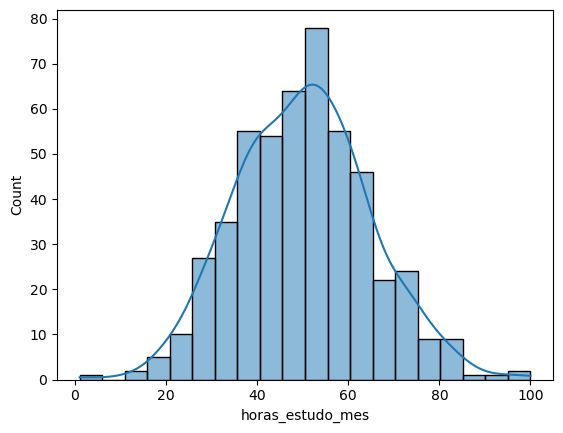

In [10]:
# Histograma da variável preditora
sns.histplot(data = df_dsa, x = "horas_estudo_mes", kde = True)

## Preparação dos Dados

In [11]:
# Prepara a variável de entrada X
X = np.array(df_dsa['horas_estudo_mes'])

In [12]:
type(X)

numpy.ndarray

In [13]:
# Ajusta o shape de X
X = X.reshape(-1, 1)

In [14]:
# Prepara a variável alvo
y = df_dsa['salario']

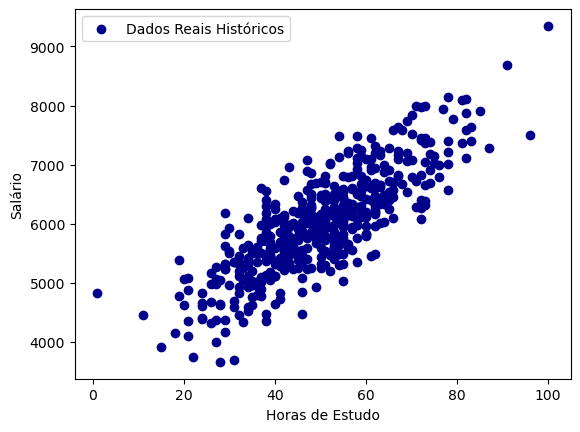

In [15]:
# Gráfico de dispersão entre X e y
plt.scatter(X, y, color = "darkblue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [16]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
X_treino.shape

(400, 1)

In [18]:
X_teste.shape

(100, 1)

In [19]:
y_treino.shape

(400,)

In [20]:
y_teste.shape

(100,)

X vira uma matriz e Y é um vetor

## Modelagem Preditiva (Machine Learning)

In [21]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [22]:
# Treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

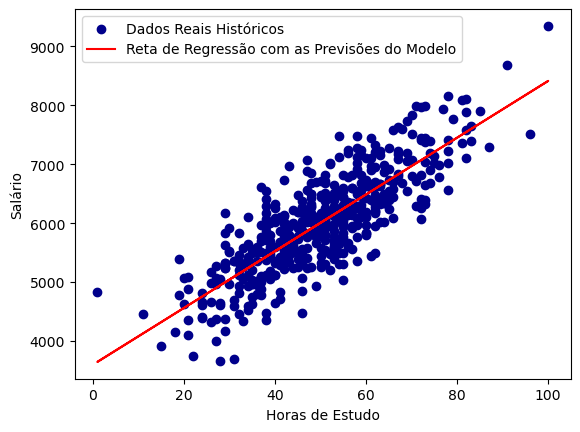

In [23]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color = "darkblue", label = "Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [24]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [25]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727527

In [26]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

## Deploy do Modelo

In [30]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[82]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[82]] horas por mês seu salário pode ser igual a [7547.69565163]


In [31]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[7547.69565163]]


In [32]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [33]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]


## Salvar esses resultados em um arquivo csv

In [39]:
# Lista de horas de estudo
horas_estudo = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Lista para armazenar os resultados
resultados = []

# Loop para fazer as previsões para cada valor de horas de estudo
for horas in horas_estudo:
    horas_estudo_novo = np.array([[horas]])
    salario_previsto = modelo.predict(horas_estudo_novo)
    
    # Arredonda o valor do salário previsto para duas casas decimais
    salario_previsto = round(salario_previsto[0], 2)
    
    # Salva os resultados na lista
    resultados.append({
        'Horas de Estudo': horas,
        'Salário Previsto': salario_previsto
    })

# Cria o DataFrame a partir dos resultados
df = pd.DataFrame(resultados)

In [40]:
df

,Horas de Estudo,Salário Previsto
0,10,4078.60
1,20,4560.42
2,30,5042.24
3,40,5524.06
4,50,6005.88
5,60,6487.69
6,70,6969.51
7,80,7451.33
8,90,7933.15
9,100,8414.97


In [41]:
# Salva o DataFrame em um arquivo CSV
df.to_csv('Salario_Previsto.csv', index=False)